In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# lectures.csv

In [2]:
df1 = pd.read_csv('lectures.csv', sep = ',')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [4]:
#non-null нет

In [5]:
df1.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [6]:
df1.drop_duplicates()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [7]:
#дубликатов нет

In [8]:
df1['type_of'].unique()

array(['concept', 'solving question', 'intention', 'starter'],
      dtype=object)

In [9]:
df1['type_of'].value_counts()

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64

In [10]:
#исследуем зависимости между tag, part, type_of

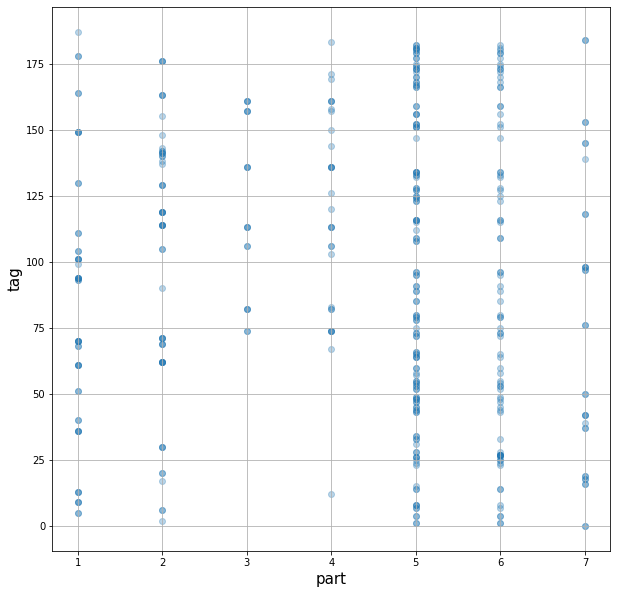

In [11]:
fig1,ax1 = plt.subplots()
ax1.scatter(x = df1['part'], y = df1['tag'], alpha=0.3)
ax1.set_xlabel('part', fontsize=15)
ax1.set_ylabel('tag', fontsize=15)
fig1.set_size_inches(10,10)
ax1.grid()

In [12]:
#преобразуем категориальный тип данных в числовой 
df1.type_of = pd.Categorical(df1.type_of)
df1['type_of_digital'] = df1.type_of.cat.codes

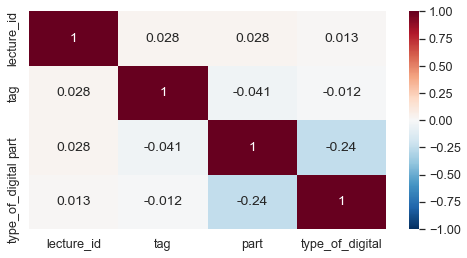

In [13]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df1.corr(),        
    cmap='RdBu_r',
    annot=True,
    vmin=-1, vmax=1);

In [14]:
#явных связей не выявлено
#присутствует связь между разделом к которому относится лекция и кратким описанием (part и type_of)

# questions.csv

In [15]:
df2 = pd.read_csv('questions.csv', sep = ',')

In [16]:
df2

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [17]:
df2.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [19]:
#присутствует один пропуск в tags, удалим его

In [20]:
df2 = df2.dropna()

In [21]:
df2['part'].value_counts()

5    5511
2    1647
3    1562
4    1439
6    1211
7    1160
1     992
Name: part, dtype: int64

<AxesSubplot:>

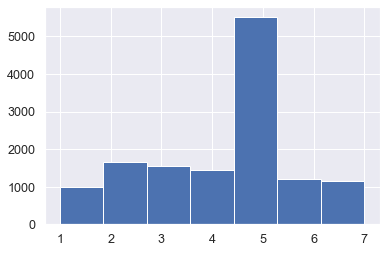

In [22]:
df2['part'].hist(bins=7)

In [23]:
#5 раздел part выделяется относительно остальных

# train.csv

In [24]:
df3 = pd.read_csv('train.csv', sep = ',', nrows = 1500000)

In [25]:
df3

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
1499995,1499995,7505209610,31566318,4426,0,4876,1,1,19000.0,True
1499996,1499996,7505258496,31566318,8748,0,4877,2,1,33000.0,True
1499997,1499997,7505295508,31566318,9412,0,4878,3,1,25000.0,True
1499998,1499998,7505347595,31566318,6406,0,4879,3,0,18000.0,True


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1500000 non-null  int64  
 1   timestamp                       1500000 non-null  int64  
 2   user_id                         1500000 non-null  int64  
 3   content_id                      1500000 non-null  int64  
 4   content_type_id                 1500000 non-null  int64  
 5   task_container_id               1500000 non-null  int64  
 6   user_answer                     1500000 non-null  int64  
 7   answered_correctly              1500000 non-null  int64  
 8   prior_question_elapsed_time     1464333 non-null  float64
 9   prior_question_had_explanation  1494250 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 114.4+ MB


In [27]:
df3.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.464333e+06
mean,7.499995e+05,7.164311e+09,1.554237e+07,5.204291e+03,1.994467e-02,8.004560e+02,1.375011e+00,6.195200e-01,2.535047e+04
std,4.330128e+05,1.053062e+10,9.233238e+06,3.882724e+03,1.398102e-01,1.030197e+03,1.194656e+00,5.249805e-01,1.956775e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,3.749998e+05,5.145690e+08,7.171715e+06,2.025000e+03,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,7.499995e+05,2.636763e+09,1.556872e+07,5.010000e+03,0.000000e+00,3.830000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,1.124999e+06,9.573303e+09,2.350614e+07,7.397000e+03,0.000000e+00,1.104000e+03,3.000000e+00,1.000000e+00,2.975000e+04
max,1.499999e+06,7.809200e+10,3.156632e+07,3.273600e+04,1.000000e+00,7.739000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [28]:
df3.isnull().sum()

row_id                                0
timestamp                             0
user_id                               0
content_id                            0
content_type_id                       0
task_container_id                     0
user_answer                           0
answered_correctly                    0
prior_question_elapsed_time       35667
prior_question_had_explanation     5750
dtype: int64

In [29]:
#prior_question_elapsed_time и prior_question_had_explanation имеют пропуски по условию:
# (null для 1-го набора вопросов или лекции)

In [30]:
df3.drop_duplicates()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
1499995,1499995,7505209610,31566318,4426,0,4876,1,1,19000.0,True
1499996,1499996,7505258496,31566318,8748,0,4877,2,1,33000.0,True
1499997,1499997,7505295508,31566318,9412,0,4878,3,1,25000.0,True
1499998,1499998,7505347595,31566318,6406,0,4879,3,0,18000.0,True


In [31]:
#нет дубликатов

array([[<AxesSubplot:title={'center':'row_id'}>,
        <AxesSubplot:title={'center':'timestamp'}>,
        <AxesSubplot:title={'center':'user_id'}>],
       [<AxesSubplot:title={'center':'content_id'}>,
        <AxesSubplot:title={'center':'content_type_id'}>,
        <AxesSubplot:title={'center':'task_container_id'}>],
       [<AxesSubplot:title={'center':'user_answer'}>,
        <AxesSubplot:title={'center':'answered_correctly'}>,
        <AxesSubplot:title={'center':'prior_question_elapsed_time'}>]],
      dtype=object)

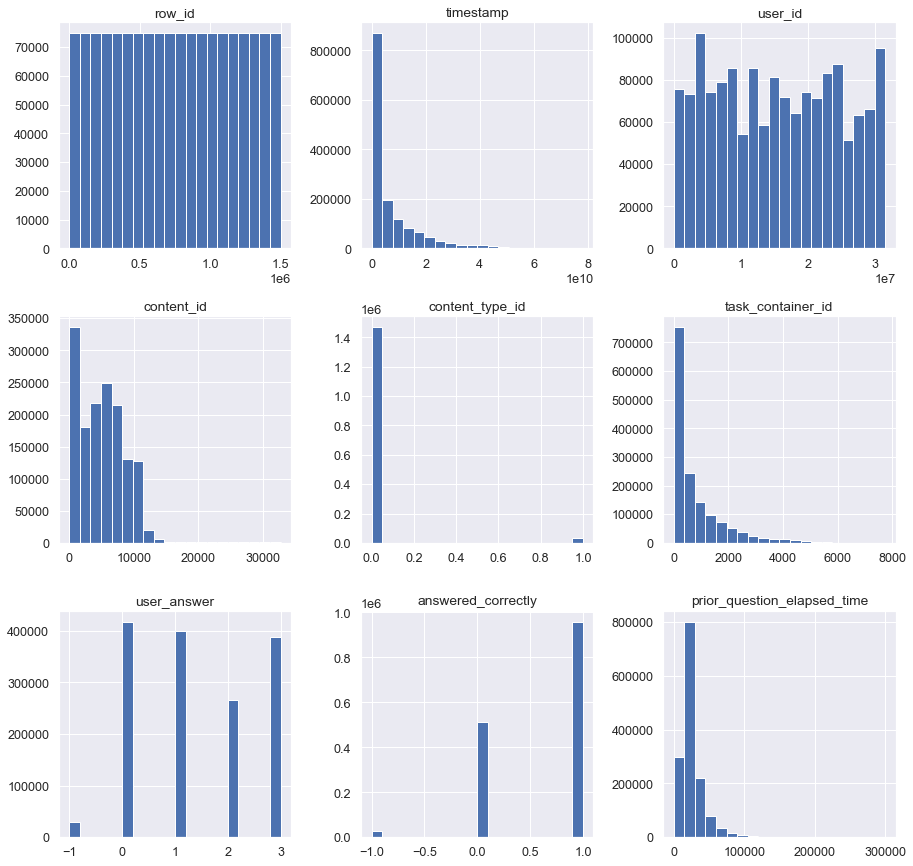

In [32]:
df3.hist(bins = 20, figsize=(15, 15))

In [33]:
#в результате анализа было принято решение изменить тип данных в столбцах для ускорения работы программы

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1500000 non-null  int64  
 1   timestamp                       1500000 non-null  int64  
 2   user_id                         1500000 non-null  int64  
 3   content_id                      1500000 non-null  int64  
 4   content_type_id                 1500000 non-null  int64  
 5   task_container_id               1500000 non-null  int64  
 6   user_answer                     1500000 non-null  int64  
 7   answered_correctly              1500000 non-null  int64  
 8   prior_question_elapsed_time     1464333 non-null  float64
 9   prior_question_had_explanation  1494250 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 114.4+ MB


In [35]:
df3['user_id'] = df3['user_id'].astype('uint32')
df3['content_id'] = df3['content_id'].astype('uint16')
df3['content_type_id'] = df3['content_type_id'].astype('int8')
df3['task_container_id'] = df3['task_container_id'].astype('uint16')
df3['user_answer'] = df3['user_answer'].astype('int8')
df3['answered_correctly'] = df3['answered_correctly'].astype('int8')
df3['prior_question_elapsed_time'] = df3['prior_question_elapsed_time'].astype('float32')
df3.info() # выводим справку о кол-ве значений в каждом столбце и формате данных датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1500000 non-null  int64  
 1   timestamp                       1500000 non-null  int64  
 2   user_id                         1500000 non-null  uint32 
 3   content_id                      1500000 non-null  uint16 
 4   content_type_id                 1500000 non-null  int8   
 5   task_container_id               1500000 non-null  uint16 
 6   user_answer                     1500000 non-null  int8   
 7   answered_correctly              1500000 non-null  int8   
 8   prior_question_elapsed_time     1464333 non-null  float32
 9   prior_question_had_explanation  1494250 non-null  object 
dtypes: float32(1), int64(2), int8(3), object(1), uint16(2), uint32(1)
memory usage: 55.8+ MB


In [36]:
#Введем переменную - успеваемость студента
df3['grade'] = df3['answered_correctly'] / df3['user_answer']

In [37]:
#преобразуем категориальный тип данных в числовой 
df3.prior_question_had_explanation   = pd.Categorical(df3.prior_question_had_explanation  )
df3['prior_question_had_explanation'] = df3.prior_question_had_explanation.cat.codes

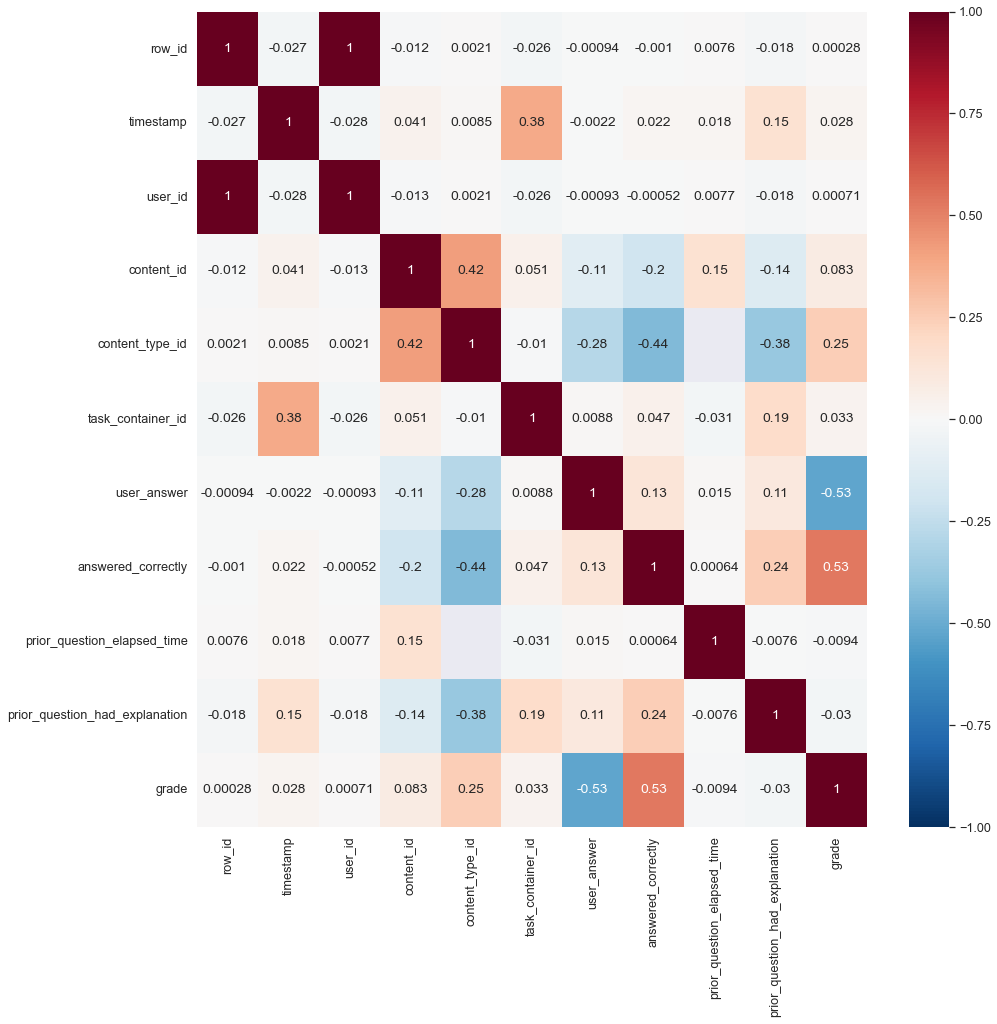

In [38]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,15))
sns.heatmap(
    df3.corr(),        
    cmap='RdBu_r',
    annot=True,
    vmin=-1, vmax=1);

In [39]:
#видно, что на успеваемость влияют: content_type_id и исходные переменные в формуле grade

In [40]:
df3

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,grade
0,0,0,115,5692,0,1,3,1,NaN,-1,0.333333
1,1,56943,115,5716,0,2,2,1,37000.0,0,0.500000
2,2,118363,115,128,0,0,0,1,55000.0,0,inf
3,3,131167,115,7860,0,3,0,1,19000.0,0,inf
4,4,137965,115,7922,0,4,1,1,11000.0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
1499995,1499995,7505209610,31566318,4426,0,4876,1,1,19000.0,1,1.000000
1499996,1499996,7505258496,31566318,8748,0,4877,2,1,33000.0,1,0.500000
1499997,1499997,7505295508,31566318,9412,0,4878,3,1,25000.0,1,0.333333
1499998,1499998,7505347595,31566318,6406,0,4879,3,0,18000.0,1,0.000000


In [41]:
#далее исследуем как влияет количество вопросов на успеваемость

In [42]:
df_user = df3[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()
df_user.head()

,user_id,user_answer,answered_correctly
0,115,72.0,32.0
1,124,49.0,7.0
2,2746,31.0,10.0
3,5382,169.0,81.0
4,8623,149.0,67.0


In [43]:
df_user.describe()

,user_id,user_answer,answered_correctly
count,5.760000e+03,5760.000000,5760.000000
mean,1.578159e+07,358.075694,161.333333
std,9.039642e+06,983.442162,466.164089
min,1.150000e+02,1.000000,-2.000000
25%,7.997718e+06,37.000000,11.000000
50%,1.571119e+07,60.000000,23.000000
75%,2.367266e+07,225.250000,97.000000
max,3.156632e+07,16907.000000,7613.000000


In [44]:
np.quantile(df_user['user_answer'], 0.75)

225.25

In [45]:
#исследуем значения ответов, которые находятся до квантеля 75%

In [46]:
df_user = df_user[df_user['user_answer'] < np.quantile(df_user['user_answer'], 0.9)]

<AxesSubplot:>

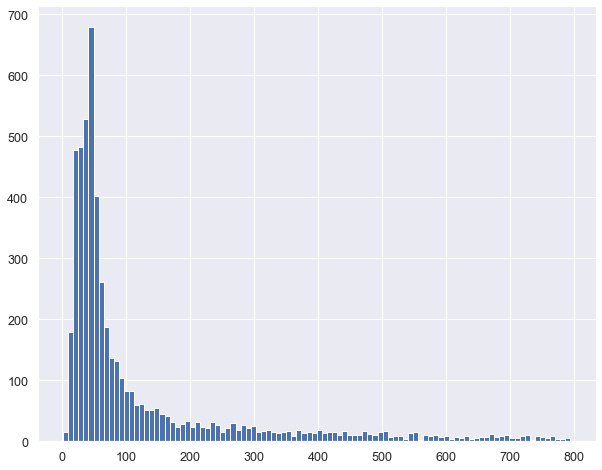

In [47]:
df_user['user_answer'].hist(bins=100, figsize=(10, 8))

In [48]:
df3.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,grade
count,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.464333e+06,1.500000e+06,1355469.0
mean,7.499995e+05,7.164311e+09,1.554237e+07,5.204291e+03,1.994467e-02,8.004560e+02,1.375011e+00,6.195200e-01,2.534719e+04,8.827547e-01,inf
std,4.330128e+05,1.053062e+10,9.233238e+06,3.882724e+03,1.398102e-01,1.030197e+03,1.194656e+00,5.249805e-01,1.956686e+04,3.334151e-01,NaN
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.0
25%,3.749998e+05,5.145690e+08,7.171715e+06,2.025000e+03,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,1.600000e+04,1.000000e+00,0.0
50%,7.499995e+05,2.636763e+09,1.556872e+07,5.010000e+03,0.000000e+00,3.830000e+02,1.000000e+00,1.000000e+00,2.100000e+04,1.000000e+00,0.5
75%,1.124999e+06,9.573303e+09,2.350614e+07,7.397000e+03,0.000000e+00,1.104000e+03,3.000000e+00,1.000000e+00,2.975000e+04,1.000000e+00,1.0
max,1.499999e+06,7.809200e+10,3.156632e+07,3.273600e+04,1.000000e+00,7.739000e+03,3.000000e+00,1.000000e+00,3.000000e+05,1.000000e+00,inf


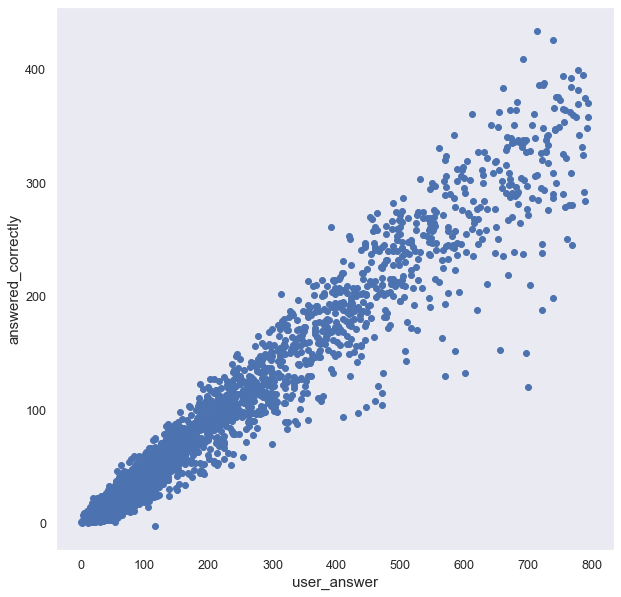

In [49]:
fig1,ax1 = plt.subplots()
ax1.scatter(x = df_user['user_answer'], y = df_user['answered_correctly'])
ax1.set_xlabel('user_answer', fontsize=15)
ax1.set_ylabel('answered_correctly', fontsize=15)
fig1.set_size_inches(10,10)
ax1.grid()

In [50]:
#наблюдается линейная зависимость, что чем на большее количество вопросов ответил студент, тем больше правильных ответов

## Результат:
1) Наблюдается слабая зависимость успеваемости и content_type_id (вопрос или лекция)

2) Также наблюдается зависисмость правильных ответов от количество ответов, т.е. чем больше ответов, тем лучше успеваемость)